# 📝 Práctica calificada

Ejecutar cada uno de los pasos indicados en la práctica.

1.   Paso 1: Importar paquetes de Python.
2.   Paso 2: Importar el dataset. Se descargará un archivo.
3.   Paso 3: Cargar el dataset.
4.   Paso 4: Exploración de los datos.
5.   Paso 5: Preprocesamiento.
6.   Paso 6: Procesamiento.
7.   Responder las preguntas.

A partir del dataset ubicado en `/content/bike-store-sales-in-europe.csv` realizar la predicción utilizando los modelos de aprendizaje supervisado:

- Regresión lineal (Sklearn).
- XGBoost.
- SHAP.

Para ello, deberá realizar:

1. Análisis exploratorio de datos (EDA) incluyendo los gráficos necesarios para explicar las variables.
  
  Tienes libertad de usar la librería que más gustes (Matplotlib, Seaborn, Plotly).

2. Utilizar los modelos de aprendizaje supervisado vistos en clase.

  - Crear un modelo de regresión lineal. Utilizar SHAP y guardar el resultado de la función summary_plot (6 pts).
  - Crear un modelo con XGBoost. Utilizar SHAP y guardar el resultado de la función summary_plot (6 pts).
  - Graficar una matriz de correlación de todas las variables (2 pts).
  - Graficar un histograma de la variable que más impacta en el mejor modelo (2 pts).
  - Responder las preguntas que se encuentran al final de la tarea (6 pts).

  **Si consideras necesario, puedes crear más celdas para resolver los puntos anteriormente indicados.**

  **La suma de los puntajes es 22. La nota máxima es 20.**

3. 🚨🚨 **ATENCIÓN:** Modificar los valores, donde corresponda, de las celdas de código. Si no se modifican los valores, el modelo generará un `accuracy` errado. Si no se modifican los valores, se restará un punto (-1 pt.) sobre el puntaje acumulado.

**Descripción de las variables:**

|N°|Variable|Descripción|
|--|--|--|
|1.|Date (Fecha)| La fecha en que se realizaron las ventas (día, mes, año).|
|2.|Customer_Age (Edad del comprador)| Representa la edad del Cliente que realiza compras.|
|3.|Age_Group (Grupo de edad)| El grupo de edad al que pertenece el cliente.|
|4.|Customer_gender|Género del Cliente.|
|5.|Country (País)| El nombre del país al que pertenece el cliente.|
|6.|State (Estado)| El nombre del estado al que pertenece el cliente.|
|7.|Product_Category (Categoría del producto)| La categoría del producto vendido.|
|8.|Sub_Category| La subcategoría del producto.|
|9.|Product| Nombre del producto.|
|10.|Order_Quantity| Cantidad de Pedidos realizados.|
|11.|Unit_Cost| El costo unitario de cada producto.|
|12.|Unit_Price| El precio unitario de cada producto.|
|13.|Profit (Beneficio)| Beneficio neto de cada Producto.|
|14.|Cost (Costo)| El costo total de la cantidad del pedido de cada Cliente.|
|15.|Revenue (Ingresos)| Los ingresos totales de cada cliente.|


## Paso 1️⃣ : Importar paquetes de Python

In [37]:
!pip install shap

In [93]:
# Visualización y manipulación de datos
import numpy as np
import pandas as pd

# Gráficos
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Modelos de regresión lineal
from sklearn.linear_model import LinearRegression
import xgboost

from sklearn.model_selection import train_test_split

# Métricas
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_error, r2_score
import shap

## Paso 2️⃣ : Importar el dataset

In [94]:
!curl --output bike-store-sales-in-europe.csv https://raw.githubusercontent.com/fcernafukuzaki/xgboost/main/bike-store-sales-in-europe.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14.5M  100 14.5M    0     0  46.1M      0 --:--:-- --:--:-- --:--:-- 46.1M


## Paso 3️⃣ : Cargar el dataset

In [95]:
dataset = '/content/bike-store-sales-in-europe.csv'

In [96]:
df = pd.read_csv(dataset)

Reemplazar los nombres de las variables por nombres en español.

In [97]:
df = df.rename({'Date': 'Fecha',
                'Customer_Age': 'Edad_del_comprador',
                'Age_Group': 'Grupo_de_edad',
                'Customer_Gender': 'Genero_del_cliente',
                'Country': 'Pais',
                'State': 'Estado',
                'Product_Category': 'Categoria_del_producto',
                'Sub_Category': 'Subcategoría_del_producto',
                'Product': 'Producto',
                'Order_Quantity': 'Cantidad_de_pedidos_realizados',
                'Unit_Cost': 'Costo_unitario',
                'Unit_Price': 'Precio_unitario',
                'Profit': 'Beneficio',
                'Cost': 'Costo',
                'Revenue': 'Ingresos'}, axis=1)

## Paso 4️⃣ : Exploración de los datos

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Fecha                           113036 non-null  object
 1   Day                             113036 non-null  int64 
 2   Month                           113036 non-null  object
 3   Year                            113036 non-null  int64 
 4   Edad_del_comprador              113036 non-null  int64 
 5   Grupo_de_edad                   113036 non-null  object
 6   Genero_del_cliente              113036 non-null  object
 7   Pais                            113036 non-null  object
 8   Estado                          113036 non-null  object
 9   Categoria_del_producto          113036 non-null  object
 10  Subcategoría_del_producto       113036 non-null  object
 11  Producto                        113036 non-null  object
 12  Cantidad_de_pedidos_realizados

Validar que no existan valores vacíos.

In [99]:
print(df.isnull().values.any())

False


Mostrar estadísticos del dataset.

In [100]:
df.describe(include='all')

,Fecha,Day,Month,Year,Edad_del_comprador,Grupo_de_edad,Genero_del_cliente,Pais,Estado,Categoria_del_producto,Subcategoría_del_producto,Producto,Cantidad_de_pedidos_realizados,Costo_unitario,Precio_unitario,Beneficio,Costo,Ingresos
count,113036,113036.000000,113036,113036.000000,113036.000000,113036,113036,113036,113036,113036,113036,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
unique,1884,NaN,12,NaN,NaN,4,2,6,53,3,17,130,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-03-01,NaN,June,NaN,NaN,Adults (35-64),M,United States,California,Accessories,Tires and Tubes,Water Bottle - 30 oz.,NaN,NaN,NaN,NaN,NaN,NaN
freq,288,NaN,11234,NaN,NaN,55824,58312,39206,22450,70120,33870,10794,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,15.665753,NaN,2014.401739,35.919212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,NaN,8.781567,NaN,1.272510,11.021936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,NaN,1.000000,NaN,2011.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,NaN,8.000000,NaN,2013.000000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,NaN,16.000000,NaN,2014.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,NaN,23.000000,NaN,2016.000000,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000


A partir de los estadísticos se visualiza que existen ocho variables categóricas (Fecha, Grupo_de_edad, Genero_del_cliente, Pais, Estado, Categoria_del_producto, Subcategoría_del_producto, Producto).



In [101]:
df.head()

,Fecha,Day,Month,Year,Edad_del_comprador,Grupo_de_edad,Genero_del_cliente,Pais,Estado,Categoria_del_producto,Subcategoría_del_producto,Producto,Cantidad_de_pedidos_realizados,Costo_unitario,Precio_unitario,Beneficio,Costo,Ingresos
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


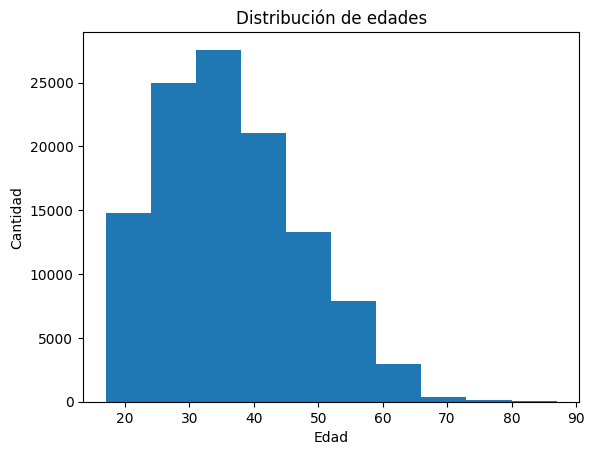

In [102]:
edades = df['Edad_del_comprador']

edad_min = edades.min()
edad_max = edades.max()

bins = 10

plt.hist(edades, bins=bins, range=(edad_min, edad_max))
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Distribución de edades')
plt.show()

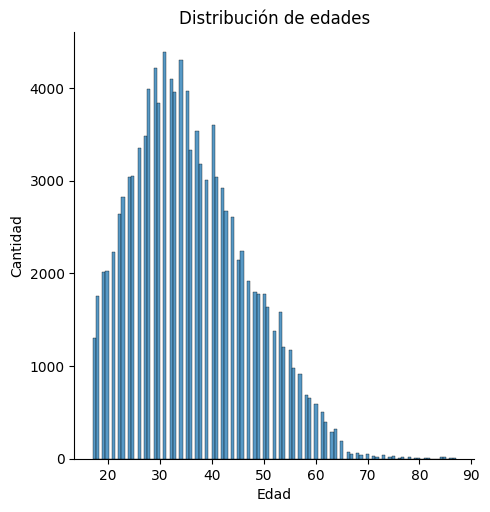

In [103]:
sns.displot(data=df, x="Edad_del_comprador", kind="hist")
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Distribución de edades')
plt.show()

Distribucion por género y edad.

In [104]:
df['Genero_del_cliente'].unique()

array(['M', 'F'], dtype=object)

In [49]:
import plotly.express as px

# Crea un histograma 2D
fig = px.density_heatmap(df, x="Edad_del_comprador", y="Genero_del_cliente")

# Muestra la figura
fig.show()

In [105]:
import plotly.express as px

# Crea un panel de abejas
fig = px.violin(df, x="Edad_del_comprador", y="Genero_del_cliente", orientation="h", box=False, points="all")

# Personaliza el gráfico
fig.update_layout(
    title="Distribución de Género por Rango de Edad",
    xaxis_title="Edad",
    yaxis_title="Género",
    # violinmode="kde",
    showlegend=False,
)

# Muestra la figura
fig.show()

Convertir variable `Fecha` tipo `object` a tipo fecha `datetime64`.

In [106]:
df['Fecha'] = pd.to_datetime(df['Fecha'])

Convertir variable `Month` tipo `object` a tipo `int64`.

In [107]:
df['Month'] = df['Fecha'].dt.month

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Fecha                           113036 non-null  datetime64[ns]
 1   Day                             113036 non-null  int64         
 2   Month                           113036 non-null  int32         
 3   Year                            113036 non-null  int64         
 4   Edad_del_comprador              113036 non-null  int64         
 5   Grupo_de_edad                   113036 non-null  object        
 6   Genero_del_cliente              113036 non-null  object        
 7   Pais                            113036 non-null  object        
 8   Estado                          113036 non-null  object        
 9   Categoria_del_producto          113036 non-null  object        
 10  Subcategoría_del_producto       113036 non-null  object 

Obtener los valores únicos de las variables categóricas.

In [115]:
variables_cagoricas = ['Edad_del_comprador',
                       'Grupo_de_edad',
                       'Genero_del_cliente',
                       'Pais',
                       'Estado',
                       'Categoria_del_producto',
                       'Subcategoría_del_producto',
                       'Producto']

In [116]:
for variable in variables_cagoricas:
    print(variable)
    print(df[variable].unique())

Edad_del_comprador
[19 49 47 35 32 34 29 51 48 43 61 57 38 52 24 23 26 54 46 41 33 42 45 53
 21 22 67 31 37 87 25 40 44 55 50 59 17 27 28 36 56 58 30 18 62 39 64 63
 20 60 84 68 65 73 69 66 75 76 78 71 72 82 86 77 74 85 81 80 70 79]
Grupo_de_edad
['Youth (<25)' 'Adults (35-64)' 'Young Adults (25-34)' 'Seniors (64+)']
Genero_del_cliente
['M' 'F']
Pais
['Canada' 'Australia' 'United States' 'Germany' 'France' 'United Kingdom']
Estado
['British Columbia' 'New South Wales' 'Victoria' 'Oregon' 'California'
 'Saarland' 'Seine Saint Denis' 'Moselle' 'Queensland' 'England' 'Nord'
 'Washington' 'Hessen' 'Nordrhein-Westfalen' 'Hamburg' 'Loir et Cher'
 'Kentucky' 'Seine (Paris)' 'South Australia' 'Loiret' 'Alberta' 'Bayern'
 'Hauts de Seine' 'Yveline' 'Essonne' "Val d'Oise" 'Tasmania'
 'Seine et Marne' 'Val de Marne' 'Pas de Calais' 'Charente-Maritime'
 'Garonne (Haute)' 'Brandenburg' 'Texas' 'New York' 'Florida' 'Somme'
 'Illinois' 'South Carolina' 'North Carolina' 'Georgia' 'Virginia' 'Ohio'
 'O

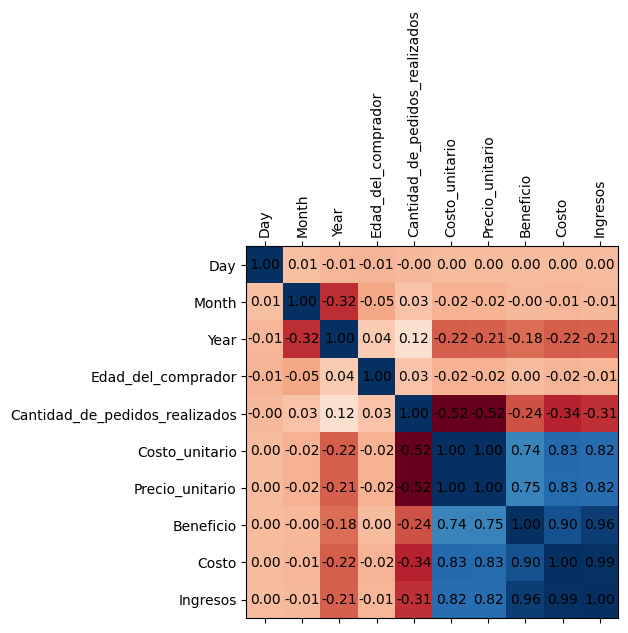

In [117]:
corr = df.corr(numeric_only=True)
figure = plt.figure()
plt.matshow(corr, cmap='RdBu', fignum=figure.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(i, j, f'{corr.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.show()

In [118]:
variables_categoricas = ['Grupo_de_edad',
                         'Genero_del_cliente',
                         'Pais',
                         'Categoria_del_producto']

df = pd.get_dummies(df,
                    columns=variables_categoricas,
                    dtype="int")

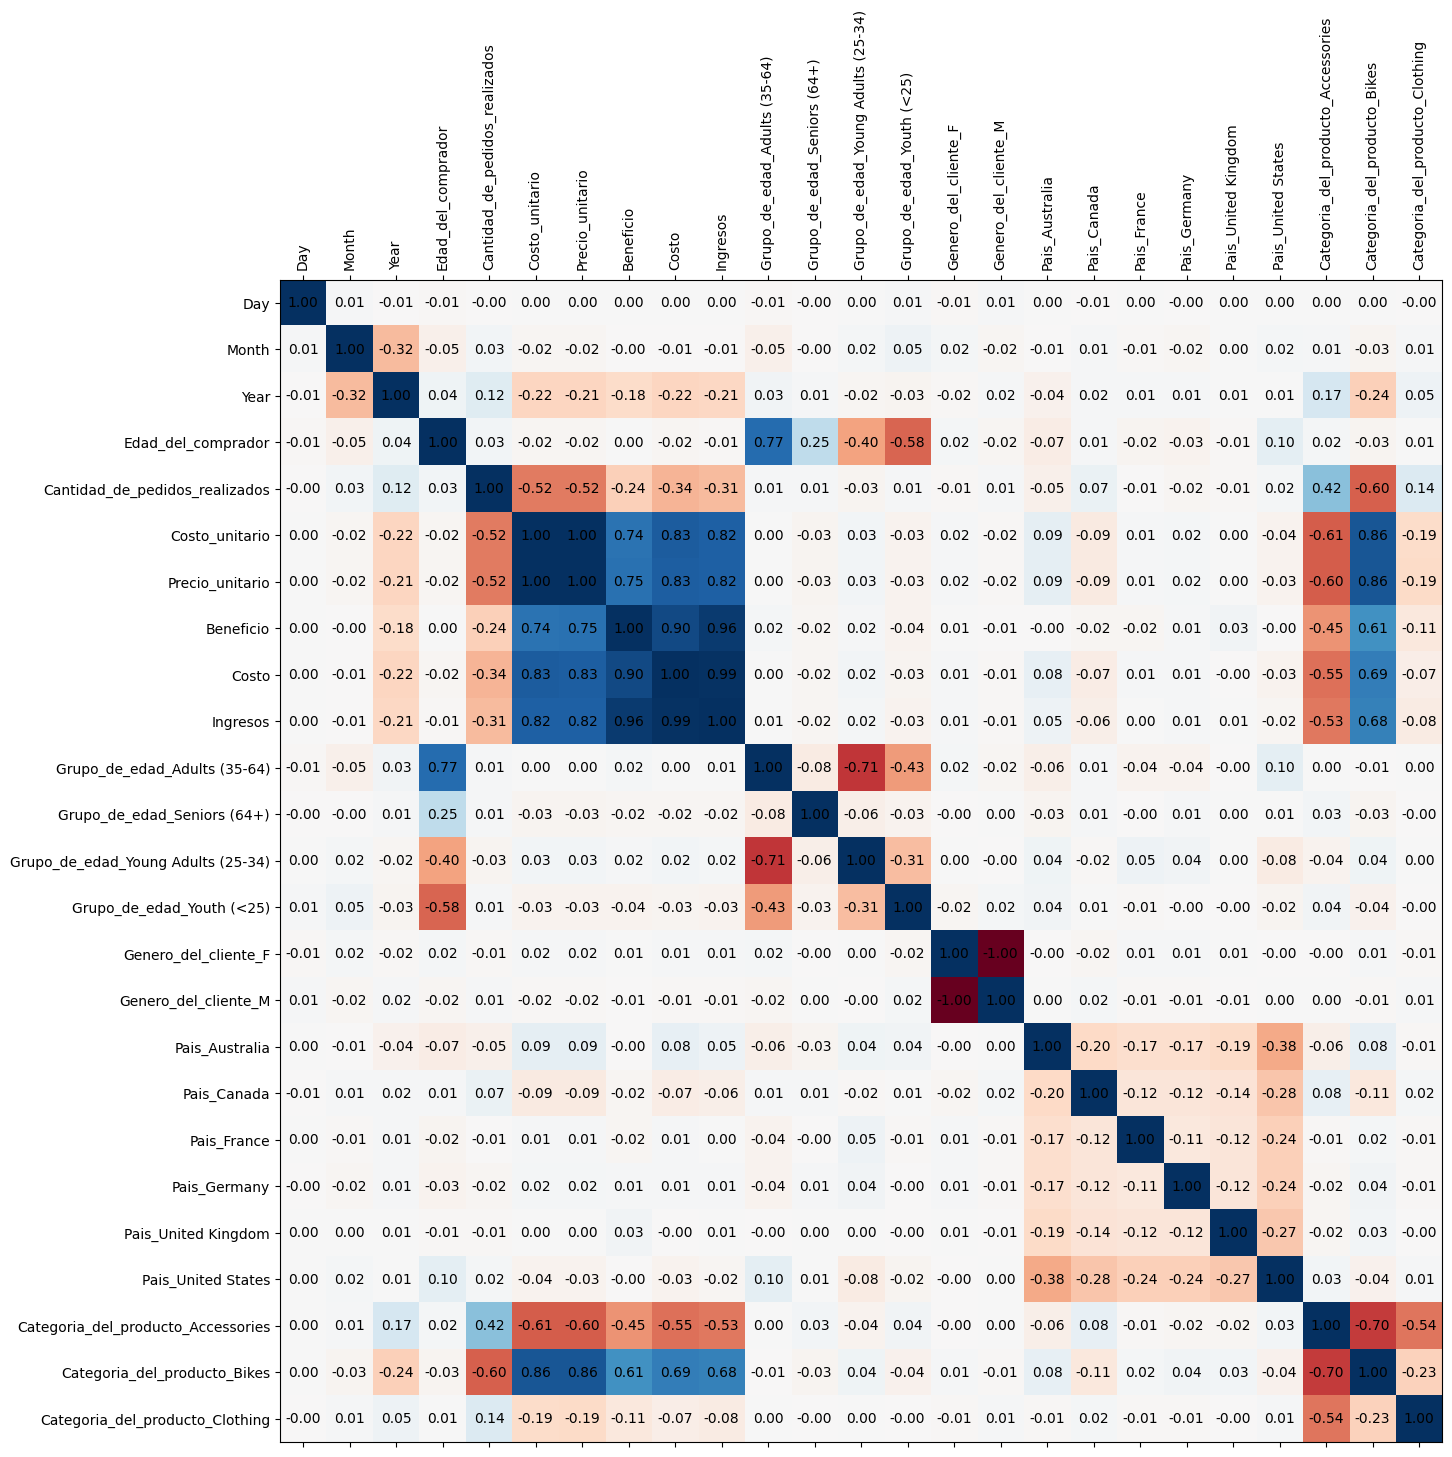

In [119]:
corr = df.corr(numeric_only=True)
figure = plt.figure(figsize=(15,15))
plt.matshow(corr, cmap='RdBu', fignum=figure.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(i, j, f'{corr.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.show()

## Paso 5️⃣ : Preprocesamiento

Validar si no existen registros duplicados.

In [120]:
df[df.duplicated()]

,Fecha,Day,Month,Year,Edad_del_comprador,Estado,Subcategoría_del_producto,Producto,Cantidad_de_pedidos_realizados,Costo_unitario,...,Genero_del_cliente_M,Pais_Australia,Pais_Canada,Pais_France,Pais_Germany,Pais_United Kingdom,Pais_United States,Categoria_del_producto_Accessories,Categoria_del_producto_Bikes,Categoria_del_producto_Clothing
1021,2013-12-19,19,12,2013,22,New South Wales,Bike Stands,All-Purpose Bike Stand,9,59,...,1,1,0,0,0,0,0,1,0,0
1091,2015-09-30,30,9,2015,42,Victoria,Bottles and Cages,Mountain Bottle Cage,5,4,...,0,1,0,0,0,0,0,1,0,0
1093,2013-10-24,24,10,2013,42,Victoria,Bottles and Cages,Mountain Bottle Cage,2,4,...,0,1,0,0,0,0,0,1,0,0
1095,2015-10-24,24,10,2015,42,Victoria,Bottles and Cages,Mountain Bottle Cage,1,4,...,0,1,0,0,0,0,0,1,0,0
1193,2016-01-15,15,1,2016,42,Seine Saint Denis,Bottles and Cages,Water Bottle - 30 oz.,14,2,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111029,2014-02-18,18,2,2014,49,California,Touring Bikes,"Touring-1000 Blue, 60",1,1482,...,0,0,0,0,0,0,1,0,1,0
111031,2016-02-18,18,2,2016,49,California,Touring Bikes,"Touring-1000 Blue, 60",1,1482,...,0,0,0,0,0,0,1,0,1,0
111265,2014-04-27,27,4,2014,31,Washington,Touring Bikes,"Touring-1000 Blue, 50",1,1482,...,1,0,0,0,0,0,1,0,1,0
111953,2013-09-20,20,9,2013,42,British Columbia,Touring Bikes,"Touring-3000 Yellow, 44",1,461,...,1,0,1,0,0,0,0,0,1,0


In [121]:
target = df["Ingresos"]

In [122]:
df.drop("Ingresos", axis=1,inplace=True)
df.drop("Fecha", axis=1,inplace=True)

Retirar las variables que muestran multicolinealidad

In [123]:
df.drop("Beneficio", axis=1,inplace=True)
df.drop("Costo", axis=1,inplace=True)

In [124]:
df.drop("Costo_unitario", axis=1,inplace=True)

In [125]:
df.drop("Precio_unitario", axis=1,inplace=True)
df.drop("Cantidad_de_pedidos_realizados", axis=1,inplace=True)

In [126]:
df.drop("Day", axis=1,inplace=True)
df.drop("Year", axis=1,inplace=True)

In [90]:
df.head()

,Edad_del_comprador,Grupo_de_edad_Adults_(35-64),Grupo_de_edad_Seniors_(64+),Grupo_de_edad_Young_Adults_(25-34),Grupo_de_edad_Youth_(menor25),Genero_del_cliente_F,Genero_del_cliente_M,Pais_Australia,Pais_Canada,Pais_France,...,Producto_Touring-3000_Blue_62,Producto_Touring-3000_Yellow_44,Producto_Touring-3000_Yellow_50,Producto_Touring-3000_Yellow_54,Producto_Touring-3000_Yellow_58,Producto_Touring-3000_Yellow_62,Producto_Water_Bottle_-_30_oz.,Producto_Women's_Mountain_Shorts_L,Producto_Women's_Mountain_Shorts_M,Producto_Women's_Mountain_Shorts_S
0,19,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,19,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,49,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,49,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,47,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Defino las variables para mi modelo de regresión lineal múltiple.


*   Variables independientes

1.   Grupo_de_edad
2.   Genero_del_cliente: Género del Cliente.
3.   Month
4.   Pais
5.   Estado
6.   Categoria_del_producto
7.   Subcategoría_del_producto
9.   Producto



*   Variable dependiente
1.   Ingresos:


Variables categóricas

La variable Genero_del_cliente solamente tiene dos posibles valores.

In [128]:
df['Edad_del_comprador'].unique()

array([19, 49, 47, 35, 32, 34, 29, 51, 48, 43, 61, 57, 38, 52, 24, 23, 26,
       54, 46, 41, 33, 42, 45, 53, 21, 22, 67, 31, 37, 87, 25, 40, 44, 55,
       50, 59, 17, 27, 28, 36, 56, 58, 30, 18, 62, 39, 64, 63, 20, 60, 84,
       68, 65, 73, 69, 66, 75, 76, 78, 71, 72, 82, 86, 77, 74, 85, 81, 80,
       70, 79])

Aumentar la complejidad al modelo realizando One Hot Encoding a las otras variables categóricas.

In [129]:
variables_categoricas = ['Month',
                         'Estado',
                         'Subcategoría_del_producto',
                         'Producto']

df = pd.get_dummies(df,
                    columns=variables_categoricas,
                    dtype="int")

Adecuar los nombres de las variables predictoras para que no tengan:

- Espacios en blanco.
- Signos de puntuación `","`.
- Signo de menor `"<"`.

In [130]:
df.columns = df.columns.str.replace(' ', '_').str.replace(',', '').str.replace('<', 'menor')

In [131]:
df.head()

,Edad_del_comprador,Grupo_de_edad_Adults_(35-64),Grupo_de_edad_Seniors_(64+),Grupo_de_edad_Young_Adults_(25-34),Grupo_de_edad_Youth_(menor25),Genero_del_cliente_F,Genero_del_cliente_M,Pais_Australia,Pais_Canada,Pais_France,...,Producto_Touring-3000_Blue_62,Producto_Touring-3000_Yellow_44,Producto_Touring-3000_Yellow_50,Producto_Touring-3000_Yellow_54,Producto_Touring-3000_Yellow_58,Producto_Touring-3000_Yellow_62,Producto_Water_Bottle_-_30_oz.,Producto_Women's_Mountain_Shorts_L,Producto_Women's_Mountain_Shorts_M,Producto_Women's_Mountain_Shorts_S
0,19,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,19,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,49,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,49,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,47,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Paso 6️⃣ : Procesamiento

In [132]:
X = df
Y = target

In [133]:
X.shape

(113036, 228)

In [134]:
Y.shape

(113036,)

### Primer modelo

Separar el dataset en conjunto de datos de entrenamiento y de test.

In [135]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=42)

Modelo de regresión lineal.

In [136]:
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)

LinearRegression()

Evaluar el conjunto de datos de entrenamiento.

In [137]:
y_train_pred = modelo_1.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(MSE(y_train, y_train_pred))
mae_train = MAE(y_train, y_train_pred)

Evaluar el conjunto de datos de test.

In [76]:
y_test_pred = modelo_1.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(MSE(y_test, y_test_pred))
mae_test = MAE(y_test, y_test_pred)

In [77]:
resultados_df = pd.DataFrame()

In [78]:
resultado = {
    'Modelo': 'Modelo 1',
    'r2_train': r2_train,
    'r2_test': r2_test,
    'rmse_train': rmse_train,
    'rmse_test': rmse_test,
    'mae_train': mae_train,
    'mae_test': mae_test
}
resultados_df = pd.concat([resultados_df, pd.DataFrame([resultado])], ignore_index=True)
resultados_df.head(10)

,Modelo,r2_train,r2_test,rmse_train,rmse_test,mae_train,mae_test
0,Modelo 1,0.729333,0.732227,681.303381,676.849275,332.99039,337.409053


In [79]:
explainer = shap.LinearExplainer(modelo_1, X_train) # Regresión lineal

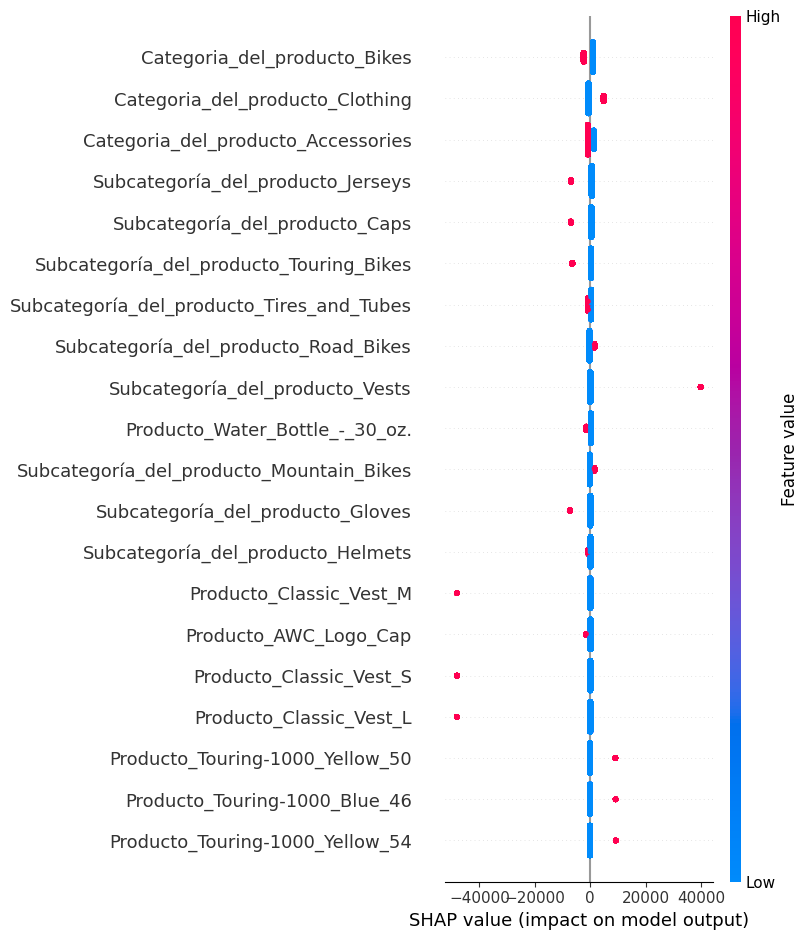

In [80]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### Segundo modelo

Separar el dataset en conjunto de datos de entrenamiento y de test.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=42)

Modelo de XGBoost.

In [82]:
modelo_2 = xgboost.XGBRegressor(objective='reg:squarederror',
                             eval_metric='rmse',
                             n_estimators=15,
                             learning_rate=0.5, # Uso de la taza de aprendizaje
                             seed=1)
modelo_2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=15, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluar el conjunto de datos de entrenamiento.

In [83]:
y_train_pred = modelo_2.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(MSE(y_train, y_train_pred))
mae_train = MAE(y_train, y_train_pred)

Evaluar el conjunto de datos de test.

In [84]:
y_test_pred = modelo_2.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(MSE(y_test, y_test_pred))
mae_test = MAE(y_test, y_test_pred)

In [85]:
resultado = {
    'Modelo': 'Modelo 2 xgboost rsme 15 arboles',
    'r2_train': r2_train,
    'r2_test': r2_test,
    'rmse_train': rmse_train,
    'rmse_test': rmse_test,
    'mae_train': mae_train,
    'mae_test': mae_test
}
resultados_df = pd.concat([resultados_df, pd.DataFrame([resultado])], ignore_index=True)
resultados_df.head(10)

,Modelo,r2_train,r2_test,rmse_train,rmse_test,mae_train,mae_test
0,Modelo 1,0.729333,0.732227,681.303381,676.849275,332.99039,337.409053
1,Modelo 2 xgboost rsme 15 arboles,0.769367,0.751268,628.902882,652.340393,303.42222,312.712994


In [86]:
explainer = shap.Explainer(modelo_2, X_train) # XGBoost

 99%|===================| 33461/33911 [00:14<00:00]       

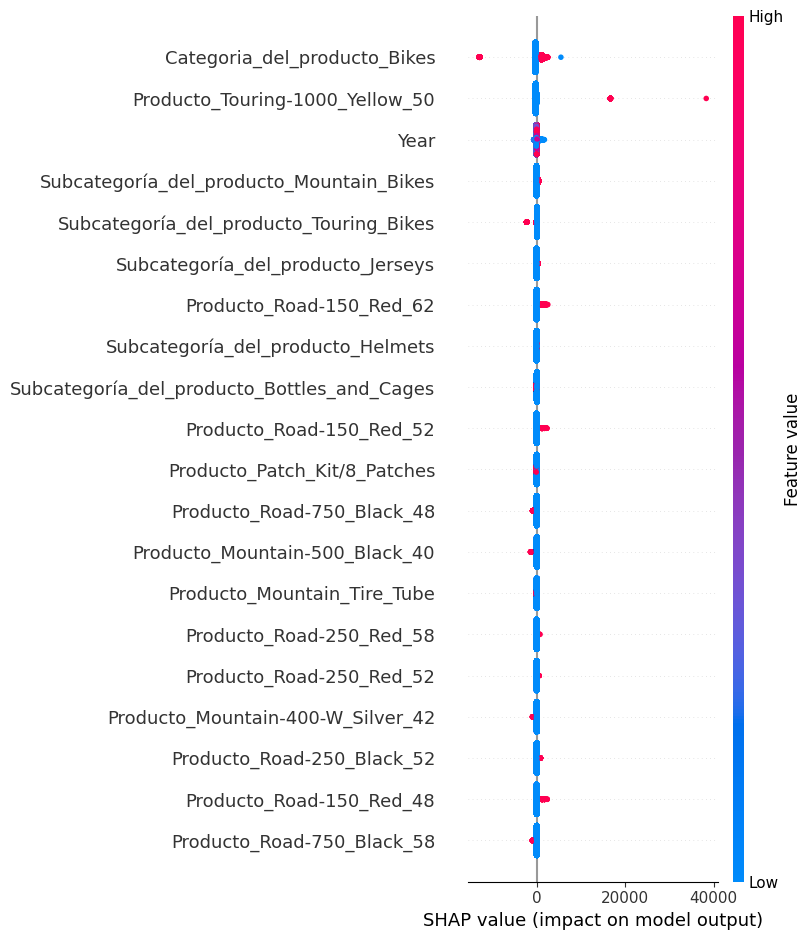

In [87]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

## 🧐 **Responde aquí las siguientes preguntas**

**Pregunta 1:**

¿Cuáles son los hiperparámetros que utilizaste en ambos modelos?




In [ ]:
# Esta es una celda para colocar tu respuesta.
# Coloca tu respuesta debajo de esta línea.
n_estimators=15
learning_rate=0.5


**Pregunta 2:**

¿Cuáles son las 3 variables que impactan más en el modelo de XGBoost?

In [ ]:
# Esta es una celda para colocar tu respuesta.
# Coloca tu respuesta debajo de esta línea.
Categoria_del_producto
Subcategoria_del_produto
Procuto


**Pregunta 3:**

Interpreta los resultados del gráfico de SHAP del modelo de XGBoost.

```
Considera en tu respuesta las dos variables que impactan más en el modelo.
Puedes utilizar como referecia los colores azul y rojo que muestra la gráfica.
```


In [ ]:
# Esta es una celda para colocar tu respuesta.
# Coloca tu respuesta debajo de esta línea.
Categoria_del_producto_Bikes y el Producto_Touring-1000_Yellow_50 son los que impactan más sobre el modelo


**Pregunta 4:**

¿Cuál modelo consideras que es mejor?

Sustenta tu respuesta.

```
Pista:
Para sustentar tu respuesta puedes comparar los valores del coeficiente de determinación.
```


In [ ]:
# Esta es una celda para colocar tu respuesta.
# Coloca tu respuesta debajo de esta línea.
El modelo 2 porque tiene un coeficiente más alto que el modelo 1